In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1) # this fetch the MNIST dataset from SciKit-learn

mnist.keys()

# datasets loaded by SL generally have a similar dictionary structure as follows : 
## a DESCR key describing the dataset
## a data key containing an array with one row per instance and one column per feature
## a target key containing an array with the labels

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X = mnist["data"]   # this contains the independent variables / features
y = mnist["target"] # this contain the solution/labels

In [4]:
X.shape # the shape method provide the dimension of the matrix, i.e. the number of row and column items 

# there are 70k images and each image has 784 features 
# each image has 28*28 pixels (784)
# each feature represent one pixel's intensity from 0 (white) to 255 (black)

(70000, 784)

In [5]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

some_digit = X[0] # assign the first item in the data to the variable "some_digit"
some_digit_image = some_digit.reshape(28,28) # Reshape the instance's feature vector to a 28*28 array

plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
y[0] # this display the first item in the label variable
# noticed that the label is a string

'5'

In [7]:
# most ML algorithnms expect numbers so lets cast y (the solution/labels) to integer 
import numpy as np
y = y.astype(np.uint8)

#  Creating the training and test datasets

In [8]:
# note that MNIST dataset is already shuffled and the dataset is already split into a training and test set (60k training and 10k test)
# a shuffled dataset ensures that all cross-validation folds will be similar

X_train = X[:60000] # this assign the first 60k items to the variable for training
X_test = X[60000:] # this assign 60k to 70k items to the variable for testing

y_train = y[:60000] # this assign the first 60k labels to the variable for training
y_test = y[60000:] # this assign 60k to 70k lables to the variable for testing

# Training a Binary Classifer using a 5-detector

In [9]:
# lets train a 5-detector binary classifer, where it detect 5s and non-5s

# creation of the training and test for the target vectors as follows : 
y_train_5 = (y_train == 5) # this return a single column displaying True for 5 and False for non-5
y_test_5 = (y_test == 5)

In [10]:
# the classifier that we will be using is called the Stochastic Gradient Descent (SGD)
# SGD can handle very large datasets efficiently as it deals with training instances independently, one at a time
# which also makes SGD well suited for online learning

# SGD Classifier is a linear classifier with SGD (Stohastic Gradient Descent - SGD) training 

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5) # we are fitting/training the model with this line of code

# note that we are training the model with the whole training set along with the solution vector that display True for 5s

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit]) # remember some digit is a 5
# the classifier correctly guess that the image represent a 5

array([ True])

# Evaluating a classifier is trickier than evaluating a regressor

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")
# in this training instance, we are splitting the training dataset into 3 folds
# Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

# for more information on cv : < https://machinelearningmastery.com/k-fold-cross-validation/ > 

In [13]:
import numpy as np
print(np.mean(scores)) 

0.9570333333333334


In [14]:
# the average accuracy is 95.7%. This can be misleading. See below for a classifier that classifies every single image in the non-5 class

In [15]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator) : 
    def fit(self, X, y = None): 
        pass
    def predict(self, X): 
        return np.zeros((len(X),1), dtype = bool)

In [16]:
never_5_clf = Never5Classifier()
x = cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

In [17]:
print(np.mean(x))
# the average accuracy is 90%
# Since only 10% of the dataset consist of images of 5, this implies that about 90% of the dataset consist of non-5 images 
# therefore the probability of guessing a non-5 image, is approx 90%

0.90965


In [18]:
# this is why accuracy is generally not a preferred preformance measure for classifier especially when it comes to dealing with skewed dataset when certain classes are much more frequent than others

# classification accuracy is the total number of correct predictions divided by the total number of predictions made for a dataset.
# as a performance measure, accuracy is inappropriate for imbalanced classification problems.

# Confusion Matrix

In [19]:
# A better way to evaluate the performance of a classifier is by looking at the confusion matrix 
# the idea is to count the number of times, instances of class A are misclassified as class B 
# for example, you want to know the number of times a 3 is misclassified as a 5, i.e. a false positive instance 

# to compute the confusion matrix, you first need a set of prediction so that they can be compared ao the actual targets

In [20]:
# cross_val_score is similar to the cross_val_predict 
# except that cross_val_predict performs K-fold cross-validation and returns the predictions made on each test fold rather than the evaluation scores 
# this means that you get a clean prediction for each instances in training set 
# "clean" meaning that the prediction is made by a model that never saw the data during training

# note that we are still evaluating the 5-estimator

from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [21]:
# we then pass the predicted class into the target classes

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_predict)

# each row in a confusion matrix represent an actual class while each column represent a predicted class

# the first row consider non-5 (negative class), 
#### and 53,892 were correctly classified as non5, and they are called TRUE NEGATIVES
#### 687 were misclassified as 5, and the are called FALSE POSITIVES

# the second row in a confusion matrix consider 5s (positive class),
#### and 1891 were misclassified as non-5s, and they are called FALSE NEGATIVE 
#### 3530 were correctly classified as 5, and there are called TRUE POSITIVES

# refer to page 91

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [22]:
# a perfect classifier would only have contain TRUE POSITIVE and TRUE NEGATIVE 

y_train_perfect_prediction = y_train_5 # a single vector displaying TRUE for 5s
confusion_matrix(y_train_5, y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

# Precision of the classifier - PRECISION & RECALL

In [23]:
# an alternative method of looking at the classifier's prediction is to look at the precision and recall of the positive prediction

# precision is a metric that quantifies the number of correct positive predictions made
# recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

# Precision = TP / (TP + FP)
# Precision = # of TRUE POSITIVE / (# of TRUE POSITIVE + # of FALSE POSITIVE)

# we can have a perfect precision where we make one single positive prediction and ensure that it is correct (precision = 1/1 = 100%)
# it is not useful since the classifer would ignore all but one positive instance

# hence precision is typically used along with another metric named "recall"
# recall also called sensitivity/true positive rate (TPR), is the ratio of TRUE POSITIVE instances that are correctly detected by the classifier 

# Recall = TP / (TP + FN)
# Recall = # of TRUE POSITIVE / (# OF TRUE POSITIVE + # OF FALSE NEGATIVE)

In [24]:
from sklearn.metrics import precision_score, recall_score

pre_score = precision_score(y_train_5,y_train_predict)
recl_score = recall_score(y_train_5,y_train_predict)

In [25]:
print(pre_score) # when the 5-detector sees an image and claim the image to be a 5, it is 83% correct of the time
print(recl_score) # out of all the 5s, it only detect 65%

0.8370879772350012
0.6511713705958311


In [26]:
# if we are comparing between two classifiers, it is better combine precision and recall into a single metric , called the F score
# F1 score is the harmonic mean of precision and recall 
# regular mean treats all values equally whereas harmonic mean give more weight to low values
# therefore, a classifier will get a high F-score only when both the precision and recall score are high

from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.7325171197343846

In [27]:
# F1 score favors classifier that have similar precision and recall

# however, in reality, you may only care about precision and not recall, and vice versa
# for example, suppose we have a classifier to detect videos that are safe for kids
### you will want classifier with a high precision rate (keep only safe videos) that also rejects many good video, i.e. low recall rate
### a classifier with a high recall rate implies that a lower precision which in turn imply that a few really bad videos shows up in the product lineup

# conversely, suppose we have a classifier to detect shoplifters
### you will want high recall rate and low precision rate will be fine
### high recall means that out of all the shoplifting cases, almost all will be detected 
### high recall imply low precision which means that there will be false alarms 

# there is a precision/recall tradeoff. in other words, you cannot have it both ways
# high recall imply low precision and vice versa

# Precision/Recall Tradeoff

In [28]:
# let's look at how SGDClassifier makes its classification decision
# for each instance, the SGDClassifier compute a score based on a decision function 
# if the score is higher than a threshold, it will assign the instance to the positive class, otherwise it will assign it to the negative class
# increasing threshold will increase precision and reduces recall
# likewise, decreasing threshold will decrease precision and increase recall

In [29]:
# SL allows you to have access to the decision score that it uses to make prediction

y_score = sgd_clf.decision_function([some_digit]) # this return the decision score for each instance # in this example, we return the decision score for some_digit variable for the 5-classifier
print(y_score)

[2164.22030239]


In [30]:
# note that the SGDCLassifier uses a thresohold of 0 
sgd_threshold = 0 
y_some_digit_pred = (y_score > sgd_threshold)
print(y_some_digit_pred)

[ True]


In [31]:
# what happens when we raise the threshold to say, 8000
sgd_threshold_new = 8000
print(y_score > sgd_threshold_new)

# the classifier did not managed to detect the 5 
# this confirms that increasing threshold reduces recall

[False]


# How to decide which threshold to use?


In [32]:
# we first use cross_val_predict to obtain all the scores 
y_scores = cross_val_predict(sgd_clf,X_train, y_train_5, cv = 3, method = "decision_function") # instead of returning prediciton, it return decision scores

# with the scores, we use the precision_recall_curve() function to compute precision and recall for all possible threshold
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [33]:
def plot_precision_recall_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
    [...]

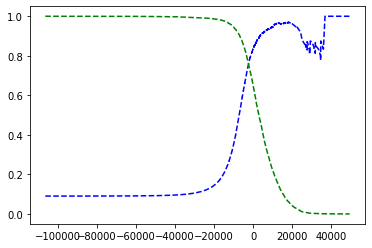

In [34]:
plot_precision_recall_threshold(precisions, recalls, thresholds)
plt.show()

In [35]:
# the precision curve (in blue) is much bumpier than the recall curve
# when the threshold increases, sometimes, the precision will decreases (however generally, precision increases with threshold)
# note that when threshold increases, recall can only go down

In [36]:
# another way to select a good precision/recall tradeoff is to plot the precision directly against recall 

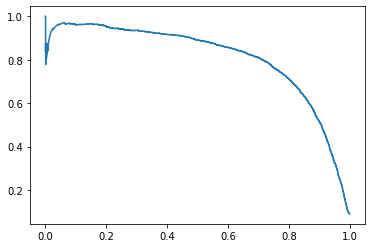

In [37]:
plt.plot(recalls, precisions)
# x axis is the recalls
# y axis is the precisions 

In [38]:
# assuming that we have decided to aim for a 90% precision
# we have to search for the lowest threshold that will give us at least 90% precision as follows : 

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)

3370.0194991439575


In [39]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [40]:
precision_score(y_train_5,y_train_pred_90)
# the threshold (searched above) produces precision rate of about 90%

0.9000345901072293

In [41]:
recall_score(y_train_5,y_train_pred_90) 
# the threshold (searched above) produces recall rate of about 47%

0.4799852425751706

# if someone says "let's reach 99% precision" you should replied "at what recall rate?"

# The ROC Curve

In [42]:
# the receiver operating chacteristics (ROC) curve plots the TRUE POSITIVE RATE TPR (Recall) against the FALSE POSITIVE RATE
# the false positive rate is the ratio of negative instance that are misclassified as positive. in other words FPR = FP / (FP + TN)
# alternatively FPR = 1 - TRUE NEGATIVE RATE (TNR)
# TNR is also called specificity 

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # this will compute the TPR and FPR for the various threshold values 

In [43]:
def plot_roc_curve(fpr, tpr, label=None) : 
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--") # this creates the dashed diagional 
    [...] # this add axis labels and grid 

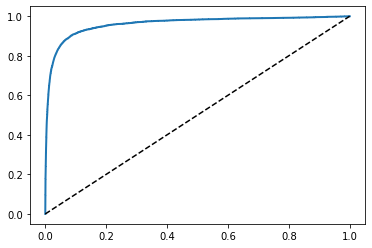

In [44]:
plot_roc_curve(fpr, tpr)
plt.show()
# x axis is FPR 
# y axis is TPR 

# the dotted line represents the ROC of a purely random classifier 
# a good classifier will stay alway from that line

# one way to compare classifier is to measure the area under curve (AUC)
# a perfect classifier will a AUC of 1 and a purely random classifier will have a AUC of 0.5

In [45]:
# to compute the AUC score 

from sklearn.metrics import roc_auc_score 
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [46]:
# Precision/Recall vs ROC 

# Chosse the Precision/Recall curve when 
#1) the positive class is rare 
#2) when you care more about the false positive than the false negative

# Random Forest Classifier

In [47]:
# we will now train a random forest classifier and compare it to the SGDClassifier 
# Random Forest Classififer does not have a decision_function method
# Instead, the Random Forest Classifier uses the predict_proba() method

from sklearn.ensemble import RandomForestClassifier 

forest_classifer = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_classifer, X_train, y_train_5, cv = 3, method = "predict_proba")
# this will return an array containing a row per instance and a column per class, with each containing the probability that the given instances belong to a given class

In [48]:
# the roc_curve() function expects labels and scores but it can also take class probabilites 
y_scores_forest = y_probas_forest[:,1] # this looks at the column index at 1 , the positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

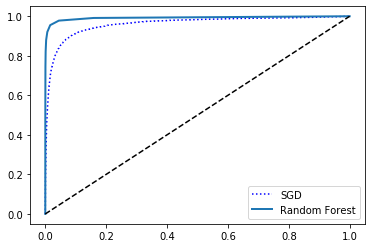

In [49]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc= "lower right")
plt.show()

In [50]:
roc_auc_score(y_train_5,y_scores_forest)

0.9920527492698306

In [51]:
forest_prediction = cross_val_predict(forest_classifer, X_train, y_train_5, cv = 3, method = "predict")

In [52]:
precision_score(y_train_5, forest_prediction)

0.986046511627907

In [53]:
recall_score(y_train_5, forest_prediction)

0.8212506917542889

In [ ]:
roc_auc_score()